# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

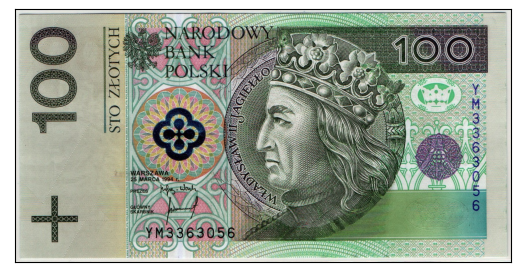

In [2]:
stuwa = cv2.imread('100zloty.jpg')
plt.imshow(stuwa)

plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
def decompose(img, bit_left):
    mask = 2**bit_left
    return img & mask

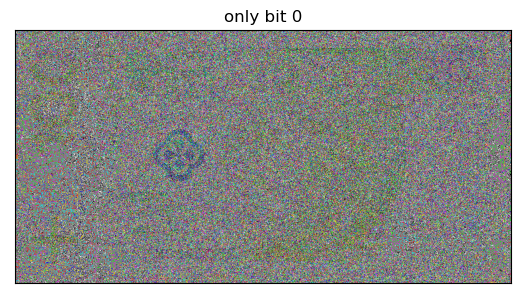

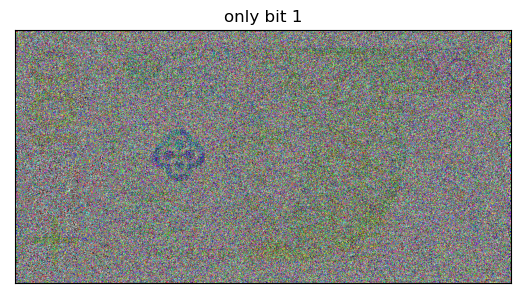

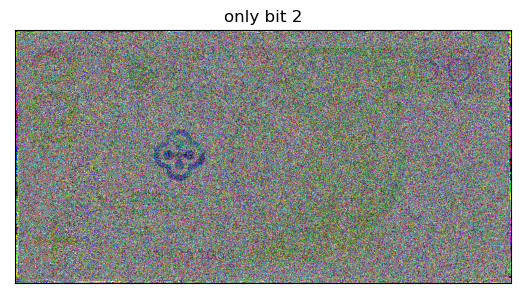

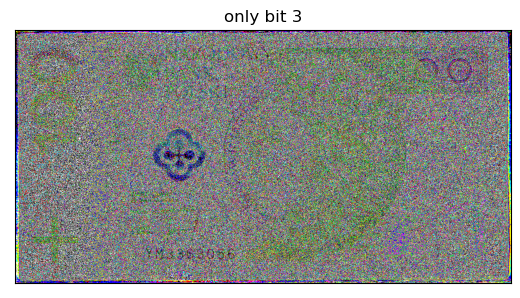

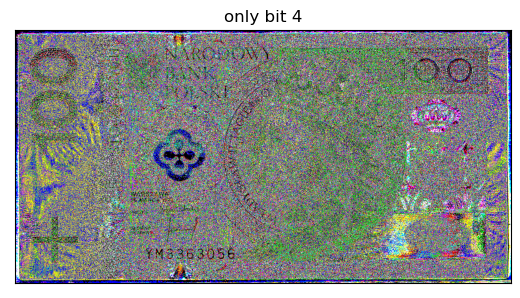

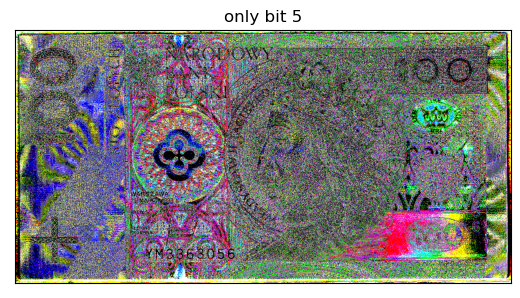

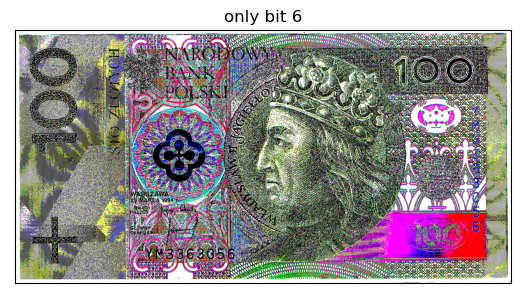

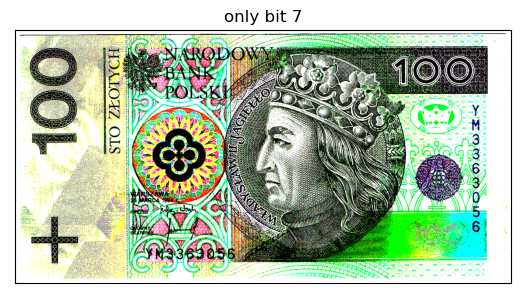

In [4]:
stuwy = []

for i in range(8):
    stuwy.append(decompose(stuwa, i))
    plt.imshow(((stuwy[i].astype('float64') * 255.0) / stuwy[i].max()).astype('uint8'))

    plt.xticks([]), plt.yticks([])
    plt.title(f'only bit {i}')
    plt.show()

In [5]:
def combine(imgs, *bits_to_combine):
    combined = imgs[0] & 0
    for bit in bits_to_combine:
        combined = combined + imgs[bit]
    return combined

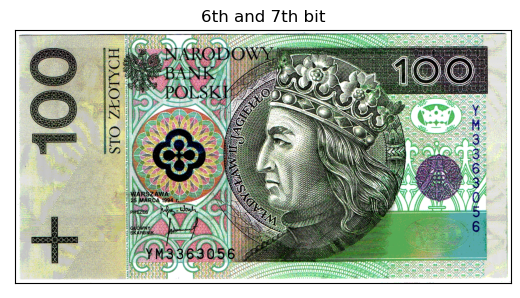

In [6]:
stuwa67 = combine(stuwy, 6, 7)
plt.imshow(((stuwa67.astype('float64') * 255.0) / stuwa67.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('6th and 7th bit')
plt.show()

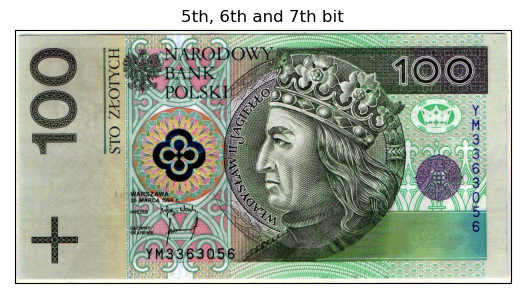

In [7]:
stuwa567 = combine(stuwy,5 , 6, 7)
plt.imshow(((stuwa567.astype('float64') * 255.0) / stuwa567.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('5th, 6th and 7th bit')
plt.show()

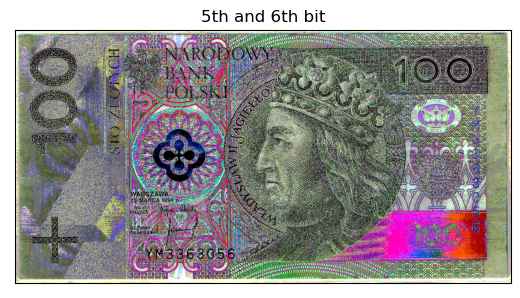

In [8]:
stuwa56 = combine(stuwy, 5, 6)
plt.imshow(((stuwa56.astype('float64') * 255.0) / stuwa56.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('5th and 6th bit')
plt.show()

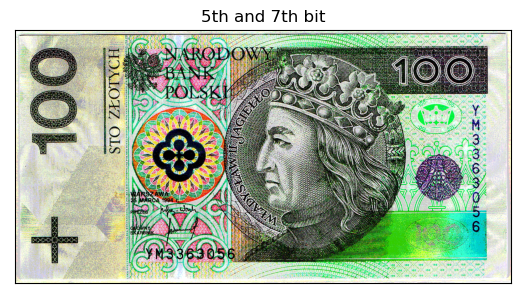

In [9]:
stuwa57 = combine(stuwy, 5, 7)
plt.imshow(((stuwa57.astype('float64') * 255.0) / stuwa57.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('5th and 7th bit')
plt.show()

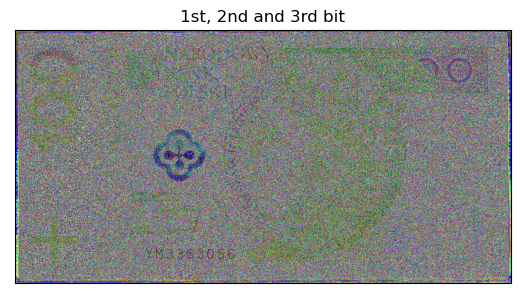

In [10]:
stuwa123 = combine(stuwy, 1, 2, 3)
plt.imshow(((stuwa123.astype('float64') * 255.0) / stuwa123.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('1st, 2nd and 3rd bit')
plt.show()

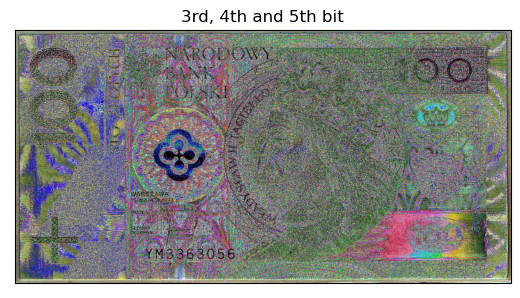

In [11]:
stuwa345 = combine(stuwy, 3, 4, 5)
plt.imshow(((stuwa345.astype('float64') * 255.0) / stuwa345.max()).astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.title('3rd, 4th and 5th bit')
plt.show()